In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13,1): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,29,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

In [5]:
Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


LON0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


if Nz!=Nz1: print("Error: Nz!=Nz1!!!")    

(6, 21, 24, 10, 12, 9)


In [54]:
# 6-monthly locations: for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_3_QBO/6_monthly_location/'
filename1 = "xyz_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File2 = open(directory1+filename1, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            Lon0 = []
            Lat0 = []
            Lev0 = []
            
            Lon3 = []
            Lat3 = []
            Lev3 = [] 
            
            Lon6 = []
            Lat6 = []
            Lev6 = []            
            for line2 in Lines2:
                a2 = line2.split(',')
                
                Lon0.append(float(a2[0]))
                Lat0.append(float(a2[1]))
                Lev0.append(float(a2[2]))

                Lon3.append(float(a2[9]))
                Lat3.append(float(a2[10]))
                Lev3.append(float(a2[11]))                
                
                Lon6.append(float(a2[-3]))
                Lat6.append(float(a2[-2]))
                Lev6.append(float(a2[-1]))                

    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        
                        LON0s[iz,iy,ix,i_day,i_month,i_year] = Lon0[i_parcel]
                        LAT0s[iz,iy,ix,i_day,i_month,i_year] = Lat0[i_parcel]
                        LEV0s[iz,iy,ix,i_day,i_month,i_year] = Lev0[i_parcel]
                        
                        LON3s[iz,iy,ix,i_day,i_month,i_year] = Lon3[i_parcel]
                        LAT3s[iz,iy,ix,i_day,i_month,i_year] = Lat3[i_parcel]
                        LEV3s[iz,iy,ix,i_day,i_month,i_year] = Lev3[i_parcel]                        
                        
                        LON6s[iz,iy,ix,i_day,i_month,i_year] = Lon6[i_parcel]
                        LAT6s[iz,iy,ix,i_day,i_month,i_year] = Lat6[i_parcel]
                        LEV6s[iz,iy,ix,i_day,i_month,i_year] = Lev6[i_parcel]
                        
                        i = i+1
                        

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_3_QBO/6_monthly_location/xyz_20000101.txt


100%|██████████| 12/12 [00:03<00:00,  3.98it/s]


QBO West: 2000.1, 2002.3, 2004.4, 2006.7, 2008.6, 

QBO East: 2001.5, 2003.9, 2005.7, 2007.6, 

In [49]:
Year_W = [0,2,4,6,8]
Month_W = [0,2,3,6,5]

Year_E = [1,3,5,7]
Month_E = [4,8,6,5]

In [59]:
Year_idx = 0
Month_idx = 0
print(Month_W[0],Year_W[0], Month_E[0],Year_E[0])

Lon_W_3mon = LON0s[2,:,10,0,Month_W[0],Year_W[0]]
Lat_W_3mon = LAT0s[2,:,10,0,Month_W[0],Year_W[0]]
Lev_W_3mon = LEV0s[2,:,10,0,Month_W[0],Year_W[0]]

Lon_E_3mon = LON0s[2,:,10,0,Month_E[0],Year_E[0]]
Lat_E_3mon = LAT0s[2,:,10,0,Month_E[0],Year_E[0]]
Lev_E_3mon = LEV0s[2,:,10,0,Month_E[0],Year_E[0]]

print(Lev_W_3mon.shape, Lev_E_3mon.shape)


# Lon_W_3mon_mean = np.mean(Lon_W_3mon, axis=(1,2))
# Lat_W_3mon_mean = np.mean(Lat_W_3mon, axis=(1,2))
# Lev_W_3mon_mean = np.mean(Lev_W_3mon, axis=(1,2))

# Lon_E_3mon_mean = np.mean(Lon_E_3mon, axis=(1,2))
# Lat_E_3mon_mean = np.mean(Lat_E_3mon, axis=(1,2))
# Lev_E_3mon_mean = np.mean(Lev_E_3mon, axis=(1,2))

# print(Lev_E_3mon_mean.shape, Lev_W_3mon_mean.shape)

0 0 4 1
(21,) (21,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

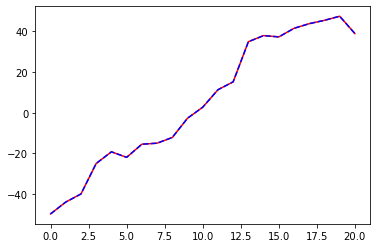

In [60]:
plt.plot(Lat_W_3mon_mean, 'r-')
plt.plot(Lat_E_3mon_mean, 'b--')
Lat_W_3mon_mean - Lat_E_3mon_mean

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

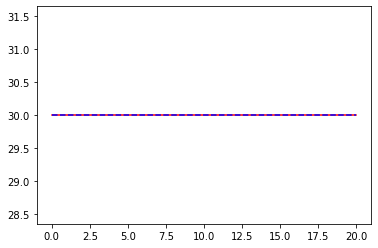

In [61]:
plt.plot(Lev_W_3mon, 'r-')
plt.plot(Lev_E_3mon, 'b--')
Lev_W_3mon_mean - Lev_E_3mon_mean

In [62]:
LAT3s[0,0,0,0,0,:], LON3s[0,0,0,0,0,:]

(array([18.04, 18.04, 18.04, 18.04, 18.04, 18.04, 18.04, 18.04, 18.04]),
 array([152.86, 152.86, 152.86, 152.86, 152.86, 152.86, 152.86, 152.86,
        152.86]))